<h1>Floating point numbers</h1>

<h2>Decimal numbers</h2>

<p>In mathematics we have different types of numbers: Integers, Rationals, Reals, ...</p>

<p>On a calculator there is one: floating point</p>

<p>On the computer there may be more than one type for each mathematical type: 8, 16, 32, 64, 128 bit integers...</p>

<p>In mathematics we primarily work with <em>decimal numbers</em></p>

<p>$$ 12.34 = 1 \cdot 10^2 + 2 \cdot 10^1 + 3\cdot 10^{-1} + 4 \cdot 10^{-2} $$</p>

<h3>Rounding</h3>

<p>We are familiar with the task of rounding: a passing grade is 59.5 not a 60!</p>

<p>We have three types of rounding: round up, round down, mixing based on a rule.</p>

<p>Rounding to the nearest integer shows this fairly clearly:</p>

In [ ]:
x = 3.14
ceil(x), floor(x), round(x)

(4.0,3.0,3.0)

<p>The same would be true of $3.1$, as that is all that is looked at here.</p>

<p>What becomes of $1.5$? The default is to round up.</p>

In [ ]:
x = 1.5
ceil(x), floor(x), round(x)

(2.0,1.0,2.0)

<p>Rounding can be done for real numbers too to some specified number of digits:</p>

In [ ]:
x = 1.23456
round(x,1), round(x,2), round(x,4)

(1.2,1.23,1.2346)

<h3>Error bound</h3>

<p>Let $x$ be the number and $\tilde{x}$ be its rounded value. How big is the difference when $x$ is rounded to $n$ decimal places?</p>

<p>We consider the value of the $n+1$st decimal number.</p>

<p>- If it is in 0,1,2,3,4 then we round down and the error is $i \cdot 10^{-(n+1)}$</p>

<p>- If it is in 5,6,7,8,9 then we round up, and the error is $10-i \cdot 10^{-(n+1)}$.</p>

<p>In either case, it is less –in absolute value – than $5*10^{-(n+1)} = 1/2 \cdot 10^{-n}$.</p>

<blockquote><p>The error in rounding to $n$ decimal points is bounded by: $|x - \tilde{x}| < 1/2 \cdot 10^{-n}$. </p></blockquote>

<p>Had we chopped (<code>floor</code>) or always rounded up (<code>ceil</code>) then the error is bounded by $10^{-n}$.</p>

<h2>Scientific notation</h2>

<p>We can write a real number in terms of powers of 10. For example:</p>

<p>$$ 1.234 = 1.234 \cdot 10^0 =  12.34 \cdot 10^{-1} =  .1234 \cdot 10^1 = \cdots $$</p>

<p>We can use normalized scientific notation to say that we can express $x$ by three quantities:</p>

<p>$$ x = \pm r \cdot 10^n $$</p>

<ul><li>$\pm$ is $+1$ or $-1$ records the sign of $x$</li><li>$r$ is a number in $0.1 \leq r < 1.0$</li><li>$n$ is an integer, possible negative, or zero.</li></ul>

<p>A more useful representation for storing on the computer is to shift things over by $1$ to get</p>

<ul><li>$r$ is a number in $1 \leq r < 10$</li></ul>

<h2>Binary numbers</h2>

<p>Binary numbers are similar, only we use base $2$ – not $10$, as with decimal.</p>

<p>So</p>

<p>$$ (10.101)_2 = 1 \cdot 2^1 + 0 \cdot 2^0 + 1 \cdot 2^{-1} + 0 \cdot 2^{-2} + 1 \cdot 2^{-3} $$</p>

In [ ]:
1*2^1 + 0*2^0 + 1*1/2^1 + 0 * 1/2^2 + 1 * 1/2^3

2.625

<h3>Scientific notation with base 2</h3>

<p>We can use different bases in scientific notation. Any number can be written as</p>

<p>$$ x = \pm q \cdot 2^m $$</p>

<p>With</p>

<ul><li>$\pm$ represents $+1$ or $-1$</li><li>$q$ -- the significand -- has $1 \leq q < 2$ (in base 2)</li><li>$m$ -- is an integer (in base 2)</li></ul>

<p>By writing $q = 1.f$ an extra digit can be gained (the 1) if only a finite number of digits are available, as is the case on the computer.</p>

<p>(In general, with a base $\beta$, we can write $x=\pm q \cdot \beta^m$ where $q$ is written in base $\beta$.)</p>

<h2>Floating point numbers</h2>

<p>Floating point is a representation of numbers using scientific notation, as above, except there are only finitely many digits that can be used for $q$ and $m$. For example, we might restrict $q$ to hold just $p$ digits ($p$ is the <em>precision</em>), and $m$ will have another restriction on the size of its digits.</p>

<p>For example, let's consider numbers of the type $d.dd \cdot 10^m$ – that is $p=3$ where $m$ is in $\{-1,0,1,2\}$. Then some numbers are: <code>1.23e3</code> , <code>-1.2oe-1</code>, <code>1.99e0</code>, ... In each case, $q$ has 3 digits and is in $[1,10)$.</p>

<p>## Binary floating point</p>

<p>For binary floating point, things are similar. For <em>simplicity</em> let's look at 16-bit floating point where</p>

<p>- 1 bit is the sign bit <code>0</code> = $+1$, <code>1</code> is $-1$ - $q$ is represented with $10$ bits (the <em>precision</em> is 10) - $m$ is represented with $5$ bits.</p>

<p>There is nothing to represent the <em>sign</em> of $m$. The trick is offset the value by subtracting and using  $m -15.</p>

<p>With this, can we represent some numbers:</p>

<p>What is $1$? It is $+1 \cdot 1.0 \cdot 10^{15 - 15}$. So we should have</p>

<p>- sign is <code>0</code> - $q$ is <code>0000000000</code> - $m$ is <code>01111</code></p>

<p>Checking we have</p>

In [ ]:
convert(Float16, 1.0) |> bits

"0011110000000000"

<p>Kinda hard to see: Let's wrap this in a function:</p>

In [ ]:
function seebits(x)
  b = bits(convert(Float16,x))
  b[1], b[2:6], b[7:end]
end

seebits (generic function with 1 method)

In [ ]:
seebits(1)

('0',"01111","0000000000")

<p>We have $2 = 1.0 \cdot 2^1$. Se we expect $q$ to represent $0$ and $m$ to represent $16$, as $16-15 = 1$:</p>

In [ ]:
seebits(2)

('0',"10000","0000000000")

<p>What about the sign bit?</p>

In [ ]:
seebits(-2)

('1',"10000","0000000000")

<p>What about other numbers</p>

In [ ]:
seebits(1 + 1/2 + 1/4 + 1/8 + 0/16 + 1/32)

('0',"01111","1110100000")

In [ ]:
seebits(2^4*(1 + 1/2 + 1/4 + 1/8 + 0/16 + 1/32)) ## 19 - (1 + 1*2 + 1*16) = 0

('0',"10011","1110100000")

<p>Numbers get rounded!</p>

In [ ]:
convert(Float16, 0.1)

float16(0.099976)

In [ ]:
seebits(0.1)

('0',"01011","1001100110")

<p>"1001100110" becomes:</p>

In [ ]:
q = (1 + 1/2 + 1/16 + 1/32 + 1/256 + 1/512 )

1.599609375

<p>And <code>01011</code> for $m$ becomes</p>

In [ ]:
m = 2.0^(1 + 2 + 8 - 15)

0.0625

In [ ]:
1 * q * 2^m

1.6704301324376012

<p>Notice the number $0.1$ is necessarily approximated.</p>

<h3>Float16, Float32, Float64, ...</h3>

<p>16-bit floating point is not typical. What is common is:</p>

<ul><li>64-bit floating point (in Julia `Float64`)</li><li>32-bit floating point (older hardward and OSes)</li></ul>

<p>How the bits are arranged in IEEE 754 binary formats for <a href="http://tinyurl.com/76kpk6s">floating point</a> we have this <a href="http://tinyurl.com/76kpk6s">table</a>. See also this post by John <a href="http://www.johndcook.com/blog/2009/04/06/anatomy-of-a-floating-point-number/">Cook</a> for the common case.</p>

<p>For example</p>

In [ ]:
b = bits(2^2 + 2^0 + 1/2 + 1/8) ## 101.101 = 1.01101 * 2^2
b[1], b[2:12], b[13:end]

('0',"10000000001","0110100000000000000000000000000000000000000000000000")

<p>Here $m = 2^10 + 1 - (2^10 - 1)$ and we can see that $q=1.01101$ with the first $1$ implicit.</p>

<p>## 0, Infinity, NaN</p>

<p>Some values in floating point are special:</p>

<ul><li>$0$: how to write $0$ in $1.f \cdot 2^m$? Can't do it. So it is coded:</li></ul>

In [ ]:
bits(0.0)

"0000000000000000000000000000000000000000000000000000000000000000"

<ul><li>$-0$: By flipping the sign bit, we could code $-0$ naturally. Is it done?</li></ul>

In [ ]:
bits(-0.0)   ## why??

"1000000000000000000000000000000000000000000000000000000000000000"

<ul><li>Infinity. [Why](http://www.cs.berkeley.edu/~wkahan/Infinity.pdf)?</li></ul>

<p>This value is deemed valuable to have supported at the hardware level. It is coded by reserviing the largest value of $m$:</p>

In [ ]:
bits(Inf)  # see bits(Inf)[2:12]

"0111111111110000000000000000000000000000000000000000000000000000"

<p>There is room for $-\infty$ and it too is defined:</p>

In [ ]:
bits(-Inf)

"1111111111110000000000000000000000000000000000000000000000000000"

<ul><li>NaN. This is a special value reserved for computations where no value is possible. Examples include `0/0` or `0 * Inf`:</li></ul>

In [ ]:
0/0, 0 * Inf

(NaN,NaN)

<p>These are related to limit problems (indeterminate), though not all forms are indeterminate:</p>

In [ ]:
1/0, 0^0

(Inf,1)

<p>How is <code>NaN</code> coded:</p>

In [ ]:
bits(NaN)

"0111111111111000000000000000000000000000000000000000000000000000"

<p>This is <em>very</em> similar to <code>Inf</code>, but the value of $q$ is non-zero!</p>

In [ ]:
bits(NaN)[13:end], bits(Inf)[13:end]

("1000000000000000000000000000000000000000000000000000","0000000000000000000000000000000000000000000000000000")

<h3>Range of numbers</h3>

<p>What is the range of the numbers that can be represented? Let's check with Float16.</p>

<p>The largest <em>positive</em> value would have $m$ coded with <code>11110</code> or ($2 + 4 + 8 + 16 - 15 = 15$)</p>

<p>The largest value for $q$ would be <code>1111111111</code>, or</p>

In [ ]:
sum([1/2^i for i in 0:10])

1.9990234375

<p>Altogether we have:</p>

In [ ]:
sum([1/2^i for i in 0:10]) * 2^15

65504.0

<p>Is this right?</p>

In [ ]:
prevfloat(typemax(Float16))

float16(65504.0)

<p>For the smallest <em>positive</em> number, the smallest exponent is code <code>00000</code> or $0 - 15 = -15$. So the value should be:</p>

In [ ]:
-sum([1/2^i for i in 0:10]) * 1/2^15

-6.1005353927612305e-5

<p>But this isn't actually the case:</p>

In [ ]:
nextfloat(convert(Float16, 0))

float16(5.9605e-8)

<p>(As there are tricks to get smaller numbers called subnormal numbers)</p>

<p>For double precision numbers (Float64) the values are given by:</p>

In [ ]:
prevfloat(Inf), nextfloat(0.0)

(1.7976931348623157e308,5.0e-324)

<h2>Machine numbers</h2>

<p>The numbers that can be represented <strong>exactly</strong> in floating point are called <em>machine number</em>.</p>

<ul><li>There aren't very many compared to the **infinite** number of floating point values.</li></ul>

<p>Let's visualize in a <em>hypothetical</em> Float8 mode with 1 sign bit, 3 exponent bits and 4 bits for the mantissa.</p>

<p>The possible <em>positive</em> values are</p>

In [ ]:
qs = [1 + i/2 + j/4 + k/8 + l/16 for i in 0:1, j in 0:1, k in 0:1, l in 0:1] |> vec |> sort

16-element Array{Float64,1}:
 1.0   
 1.0625
 1.125 
 1.1875
 1.25  
 1.3125
 1.375 
 1.4375
 1.5   
 1.5625
 1.625 
 1.6875
 1.75  
 1.8125
 1.875 
 1.9375

<p>The values for the exponents are $-3, -2, -1, 0, 1, 2, 3$. So all our values are given by</p>

In [ ]:
ms = (-3):3
vals = [q * 2.0^m for q in qs, m in ms] |> vec

112-element Array{Any,1}:
  0.125   
  0.132813
  0.140625
  0.148438
  0.15625 
  0.164063
  0.171875
  0.179688
  0.1875  
  0.195313
  0.203125
  0.210938
  0.21875 
  ⋮       
 10.0     
 10.5     
 11.0     
 11.5     
 12.0     
 12.5     
 13.0     
 13.5     
 14.0     
 14.5     
 15.0     
 15.5     

<h3>Plotting the machine numbers</h3>

<p>We can plot these points:</p>

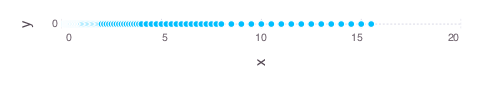

In [ ]:
using Gadfly
plot(x = vals, y = 0*vals, Geom.point)

<p>We notice:</p>

<ul><li>they are definitely finite</li><li>there are definitely gaps</li><li>they are not evenly spaced out</li><li>there is a "hole" near 0</li></ul>

<h3>Machine precision</h3>

<p>Of special note is the size of the gap between values around 1:</p>

In [ ]:
nextfloat(1.0)

1.0000000000000002

<p>This is sometimes called <em>machine precision</em> and in <code>Julia</code> is returned by <code>eps()</code>:</p>

In [ ]:
eps()

2.220446049250313e-16

In [ ]:
eps(Float16)

float16(0.00097656)

<h3>Rounding</h3>

<p>As not every number is a machine number, numbers are rounded to machine numbers. There are variants of rounding methods. Some are:</p>

<ul><li>round to nearest: find the closest machine number. If a tie round to the even number.</li><li>round to $0$: round down if positive, up if negative</li><li>round to $\infty$ (or $-\infty$): always round up (or down)</li></ul>

<p>How big can the error be in rounding one number? Let $p$ be the precision and $\beta=2$, for simplicity we take $p=3$. We can write</p>

<p>$$ x=1.a_1 a_2 a_3 a_4 \dots 2^m = 1.a_1 a_2 a_3 2^m + e $$</p>

<p>where</p>

<p>$$ e=.000a_4 a_5 \dots 2^m = 0.a_4a_5\dots 2^{-p} 2^m. $$</p>

<p>If we round down, we take $e=0$.</p>

<p>If we round up, we take $e = 1\cdot 2^{-p} 2^m$.</p>

<p>At most the error is $1/2 2^{-p} 2^m$.</p>

<p>The <em>relative error</em> is at most</p>

<p>$$ |\frac{x - fl(x)}{x}| = |\frac{e}{x} = \frac{1/2 2^{-p} 2^m}{q 2^m} \leq 1/2 2^{-p} $$</p>

<p>(With just chopping there would be no $1/2$.)</p>

<p>The book writes $fl(x)$ for the floating point value of $x$. If $\delta$ is the relative error, then we have $fl(x) = x (1 + \delta)$ and $|\delta| \leq 1/2 2^{-p}$.</p>

<h3>next closest number</h3>

<p>Suppose $x = 1.a_1a_2 \cdot a_p \cdot 2^m$ is a machine number with precision $p$. What is the relative size of the next largest number? This would be</p>

<p>$$ x' = (1.a_1a_2 \cdot a_p + 2^{-p}) \cdot  2^m $$</p>

<p>The absolute difference being $2^{m-p}$. So if $m$ is larger, the difference is larger – bigger gaps. The <em>relative difference</em> is basically a constant: $2^{-p}2^m/(q 2^m) \leq 2^{-p}$. </p>

<h2>Error analysis of arithmetic operations</h2>

<p>Rounding can mess with our "inituitive" ideas of how numbers work: Consider the familiar decimal case with $p=3$.</p>

<p>What is $10.1 - 9.93$?</p>

<p>In regular subtraction we align the decimal points</p>

In [ ]:
Verbatim("""
10.10
09.93
-----
00.17
""")

<p>On the computer though values are shifted to align the decimal points. Hence $9.93$ could become $0.99 \cdot 10^{1}$, if chopped. So that subtraction becomes</p>

In [ ]:
Verbatim("""
10 *  1.01
      0.99
      ----- 
10 *  0.02
""")

<p>The difference between $.20$ and $.17$ is 3 units in the off in the last digit of precision. So rounding can have an adverse effect.</p>

<p>### How far off can subtraction with shifting and truncation be?</p>

<p>Suppose we have  precision $p$ and binary ($\beta=2$). Then the <em>relative</em> error can be as large as 1 = $\beta-1$!</p>

<p>Consider a small case: $1.00 \cdot 2^0$ and $1.11 \cdot 2^{-1}$. (These are adjacent). Then mathematically the difference is $0.001$, but if $1.11 2^{-1}$ is shifted (and chopped) to $0.11 \cdot 2^0$ to match, then the difference is $0.01$. We have $|(0.001 - 0.01)/(0.001)| =  1$.</p>

<p>To work around this loss, <em>guard bits</em> are used in practice.</p>

<h2>Analysis of floating point operations</h2>

<p>Consider more generally the basic operations of addition, subtraction, multiplication, and division.</p>

<p>Let's assume (contrary to above) that the operations on floating point are correctly done and <em>then</em> rounded to a machine number. (This can be arranged by using more bits for intermediate computations).</p>

<p>If $\odot$ is any of the above operations, what is $fl(x \odot y)$?</p>

<p>We know for $x$ that $fl(x) = x(1 + \delta)$ where $\delta$ is small ($\leq 2^{-p}$) and depends on $x$. So,</p>

<p>$$ fl(x \odot y) = fl(fl(x) \odot fl(y)) = <a href="1 + \delta">(x(1+\delta_x) \odot (y(1 + \delta_y))</a> $$</p>

<p>Each $\delta is small.</p>

<p>Well, how much off are we?</p>

In [ ]:
using SymPy
x,y,d1,d2,d3 = symbols("x,y,d1,d2,d3", real=true)
op = *
( op(x*(1+d1), y*(1+d2)) * (1 + d3) - op(x,y))/op(x,y) |> expand

In [ ]:
op = /
( op(x*(1+d1), y*(1+d2)) * (1 + d3) - op(x,y))/op(x,y) |> expand

<p>But...</p>

In [ ]:
op = -
( op(x*(1+d1), y*(1+d2)) * (1 + d3) - op(x,y))/op(x,y) |> expand

<h2>Addition of numbers and cumulative error</h2>

<p>How do errors accumulate?</p>

<blockquote><p>Theorem 1 (p49) relative error in $\sum_0^n x_i$ is $(1_\epsilon)^n-1 \approx n\epsilon$. </p></blockquote>

<p>Let $S_{k+1} = x_{k+1} + S_k$ be the partial sum and $S^<em>_{k+1} = fl(x_{k+1} + S</em>_k) = (x_{k+1}+S^*_k)(1+\delta_{k+1}$ be the floating point partial sum. What is the relative difference?</p>

<p>$$ \frac{S_{k+1} - S^*_{k+1}}{S_{k+1}} = \frac{S_{k+1}(1+\delta) - S^*_{k+1}(1+\delta) - S_{k+1}\delta}{S_{k+1} = (1 + \delta)\frac{S_k - S^*_k}{S_k}\frac{S_k}{S_{k+1}} - \delta $$</p>

<p>Let $\rho_k$ be the absolute value. Then $\rho_{k+1} \leq \rho_k(1+\epsilon) + \espilon$ with $\rho_0 = 0$. This can be solved to yield: $\rho_n \leq (1 + \epsilon)^n - $.</p>

<h3>Other bounds</h3>

<p>The maximal possible error for accumulating sums grows <em>linearly</em> with the number of sums. There are other algorithms to cut this down. In Julia, <a href="https://en.wikipedia.org/wiki/Pairwise_summation">pairwise</a> summation is used. This has relative error given by $\epsilon \log_2(n)$.</p>

<p>## Loss of significance</p>

<p>Return to</p>

In [ ]:
op = -
( op(x*(1+d1), y*(1+d2)) * (1 + d3) - op(x,y))/op(x,y) |> expand

<p>The presence of the difference in the denominator can be a problem.</p>

<p>In the book, we have Thm 1 of section 2.2</p>

<blockquote><p>If $x$ and $y$ are binary floating point numbers with $x > y > 0$ with </p></blockquote>

<p>$$ 2^{-q} \leq 1 - y/x \leq 2^{-p} $$ Then at most $q$ and <em>at least</em> $p$ significant binary bits are lost in the substraction $x-y$.</p>

<p>The lower bound:</p>

<p>Say $x = r \cdot 2^n$ and $y=s\cdot 2^m$ with $m \leq n$ and here $1/2 \leq r, s < 1$. Then to "line up the decimal points" we may write $y = s \cdot 2^(m-n) \cdot 2^n$.</p>

<p>$$ x - y = (r - s\cdot 2^{m-n}) \cdot 2^n $$</p>

<p>The significand then satisfies:</p>

<p>$$ r - s \cdot 2^{m-n} = r(1 - \frac{s\cdot 2^m}{r \cdot 2^n}) = r(1 - y/x) < 2^{-p} $$</p>

<p>To put into normalized floating point, the significand must be shifted (there are leading $0$s) and the (at least) $p$ terms added are spurious, so accuracy is lost.</p>

<h3>Example</h3>

<p>Consider $\sin(x) \approx x$. So $\sin(x) - x$ will cause issues.</p>

In [ ]:
x = 1/2^5
X = big(1/2^5)   # more precision
sin(x) - x

-5.086014673919698e-6

In [ ]:
sin(X) - X

-5.086014673921260418878742535535373921881201068959602540274778455791996714357325e-06 with 256 bits of precision

<p>Only accurate to the 10th digit – not the 16th. There is a loss of accuracy</p>

<p>Compare this to</p>

In [ ]:
sin(x) + x

0.062494913985326084

<p>and</p>

In [ ]:
sin(X) - X

-5.086014673921260418878742535535373921881201068959602540274778455791996714357325e-06 with 256 bits of precision

<p>The moral of the story – try to avoid these.</p>

<h2>Accuracy of functions</h2>

<p>In <code>Julia</code> there are many "redundant" functions:</p>

<ul><li>`sinpi` for computing $\sin(\pi x)$, `cospi`, ...</li><li>`expm` to compute $e^x - 1$ for $x$ near 0</li><li>`log1p` to compute $\log(1+x)$ near 0</li></ul>

<p>The reason for <code>expm</code> seems clear. $e^x \approx 1 + x + x^2/2! + \cdot$, so $e^x-1$ for small $x$ is a subtraction of like-sized values.</p>

<p>For <code>log1p</code> <a href="http://www.johndcook.com/blog/2010/06/07/math-library-functions-that-seem-unnecessary/">Cook</a> if $x$ is really small, say $x=10^{-17}$ (<code>x < eps()</code>), then what happens to $1 + x$? In floating point it is 1. But $\log(1+x) \approx x$ by Taylor, so the absolute error is $x$ and the relative error $1$. Quite large. There are more floating point values closer to $0$ than $1$, so smaller values of $x$ can be used in <code>log1p</code>. </p>

<p>What about <code>sinpi</code>?</p>

<p>The first step in </p>